<a href="https://colab.research.google.com/github/manishshah7974/Plant_Disease_Detection/blob/main/Plant_Disease_Code_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras
import tensorflow
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir("/content/drive/MyDrive/plant_village_dataset")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Black_rot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Common_rust_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___L

#Preprocessing Data

In [5]:

train_datagen =ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= preprocess_input )
val_datagen =ImageDataGenerator(preprocessing_function= preprocess_input )


In [6]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plant_village_dataset",
                                           target_size= (256,256),
                                           batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plant_village_dataset",
                                           target_size= (256,256),
                                           batch_size=32)

Found 54635 images belonging to 38 classes.
Found 54635 images belonging to 38 classes.


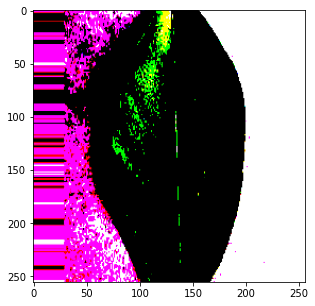

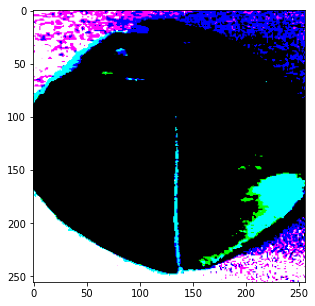

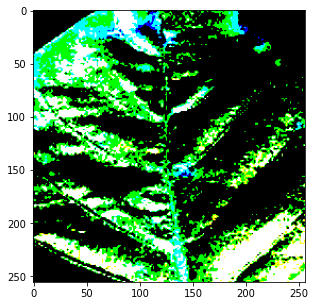

In [7]:
t_img,label = train.next()
def plotImage(img_arr, label):
   for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()
plotImage(t_img[:3], label[:3])


#BUILDING OUR MODEL :

In [8]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [9]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 4s 0us/step


In [10]:
for layer in base_model.layers:
 layer.trainable = False

In [11]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
X = Flatten()(base_model.output)

X = Dense(units= 38, activation="softmax")(X)

#Creating our model
model = Model(base_model. input, X)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# Early Stopping & Model Check Points

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


#Early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta= 0.01, patience= 3, verbose=1, save_best_only=True)

cb=[es,mc] 

In [15]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy , metrics= ['accuracy'])


In [16]:
his = model. fit_generator(train ,
steps_per_epoch= 16,
epochs= 50,
verbose= 1,
callbacks= cb ,
validation_data= val ,
validation_steps= 16 )

<ipython-input-16-c1d6fe8ac25f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model. fit_generator(train ,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 22.3563 - accuracy: 0.3281 
Epoch 1: val_accuracy improved from -inf to 0.52734, saving model to best_model.h5
16/16 [==============================] - 708s 45s/step - loss: 22.3563 - accuracy: 0.3281 - val_loss: 12.6645 - val_accuracy: 0.5273
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 15.1866 - accuracy: 0.4922 
Epoch 2: val_accuracy improved from 0.52734 to 0.62891, saving model to best_model.h5
16/16 [==============================] - 682s 44s/step - loss: 15.1866 - accuracy: 0.4922 - val_loss: 8.4766 - val_accuracy: 0.6289
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 9.5688 - accuracy: 0.5781 
Epoch 3: val_accuracy improved from 0.62891 to 0.73438, saving model to best_model.h5
16/16 [==============================] - 684s 44s/step - loss: 9.5688 - accuracy: 0.5781 - val_loss: 4.7310 - val_accuracy: 0.7344
Epoch 4/50
16/16 [==============================] - ETA: 0s - 

#Load the Best Model

In [47]:
from keras.models import load_model

model = load_model("/content/best_model.h5")


In [20]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys()) ))
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# Making Prediction

In [32]:
import numpy
def prediction(path):
 img = load_img(path, target_size= (256,256))
 #i  = img.to_array(img)
 i = numpy.asarray(img)
 im = preprocess_input(i)
 img = np.expand_dims(im , axis= 0)
 pred = np.argmax(model.predict(img))

 print(f' The image belongs to  { ref[pred] } ')


In [38]:
path ="/content/drive/MyDrive/plant_village_dataset/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

prediction(path)

path="/content/drive/MyDrive/plant_village_dataset/Soybean___healthy/00457581-0077-442d-b19a-0dc6027e8cfc___RS_HL 5635.JPG"
prediction(path)

1/1 [==============================] - 0s 16ms/step
 The image belongs to  Apple___Apple_scab 
1/1 [==============================] - 0s 17ms/step
 The image belongs to  Soybean___healthy 


In [25]:
model.save('my_model.h5')


In [27]:
# Convert the model.
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [28]:
model.save('you_model_name.tf')


In [40]:
history=his
print(history.params)

print(history.history.keys())

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

{'verbose': 1, 'epochs': 50, 'steps': 16}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


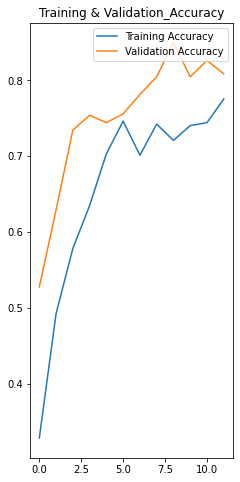

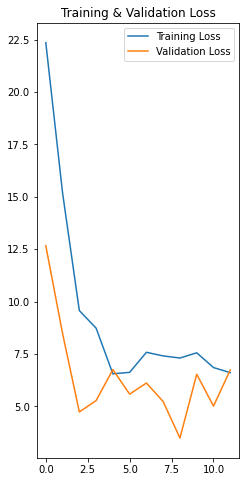

In [46]:
EPOCHS=12
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Training & Validation_Accuracy") 

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training & Validation Loss")     
plt.show()    

In [48]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split = 0.1 , test_split = 0.1 ,shuffle=True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  train_ds = ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds , val_ds , test_ds

In [51]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 12

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plant_village_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE
)


In [55]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [58]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)
print("Sizes Of :")
print("Train Set :",len(train_ds)," [20%]")
print("Validation Set :",len(val_ds)," [10%]")
print("Test Set :",len(test_ds)," [10%]")


Sizes Of :
Train Set : 1366  [20%]
Validation Set : 170  [10%]
Test Set : 172  [10%]


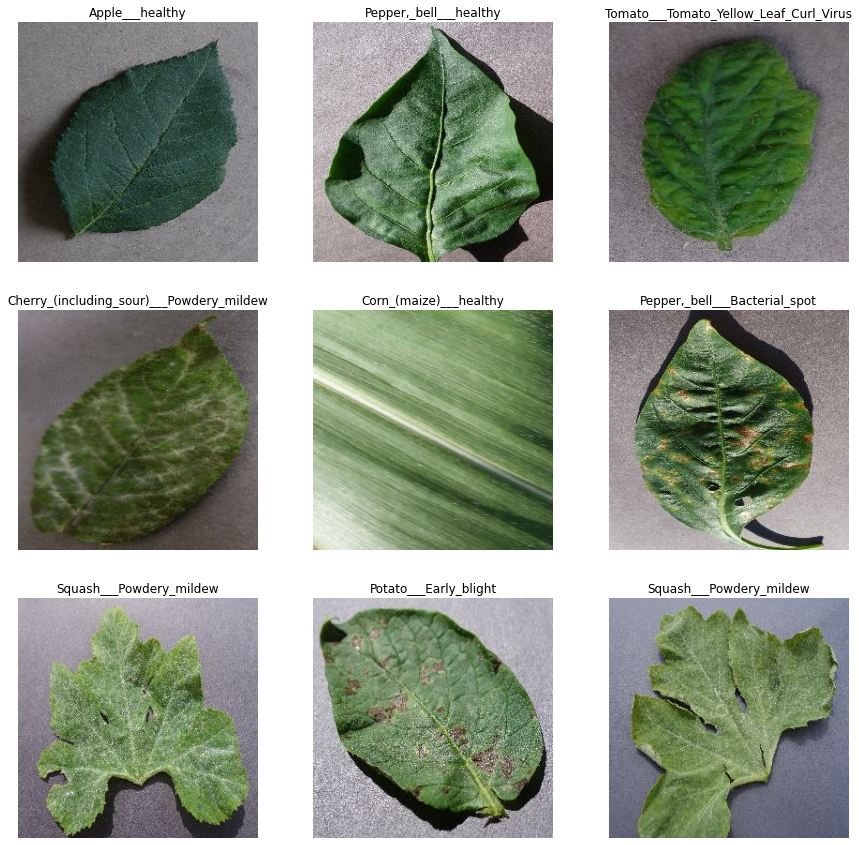

In [56]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
for i in test_ds:
  prediction(i)